In [1]:
# imports 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
cf.go_offline()

In [2]:
# importing the data set
df = pd.read_csv('../data/diamonds_train.csv')

# Exploring the Data Set

In [3]:
# examination the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [29]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.10
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.40
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.44
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.27
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.43


# Information about the columns

- carat: Carat weight of the diamond (Peso en quilates del diamante)
- cut: Describe cut quality of the diamond. Quality in increasing order (Ideal, Premium, Very good, Good, Fair).
- color: D being the best and J the wors
- clarity: How obvious inclusions are within the diamond (IF, VVS2, VS1, VS2, Sl1, Sl2, I1)
- depth % : The height of a diamond, measured from the culet to the table, divided by its average girdle (faja) diameter
- table%: The width of the diamond's table expressed as a percentage of its average diameter
- price: price of each diamond.
- x: lengh mm
- y: width mm (ancho)
- z: depth in mm

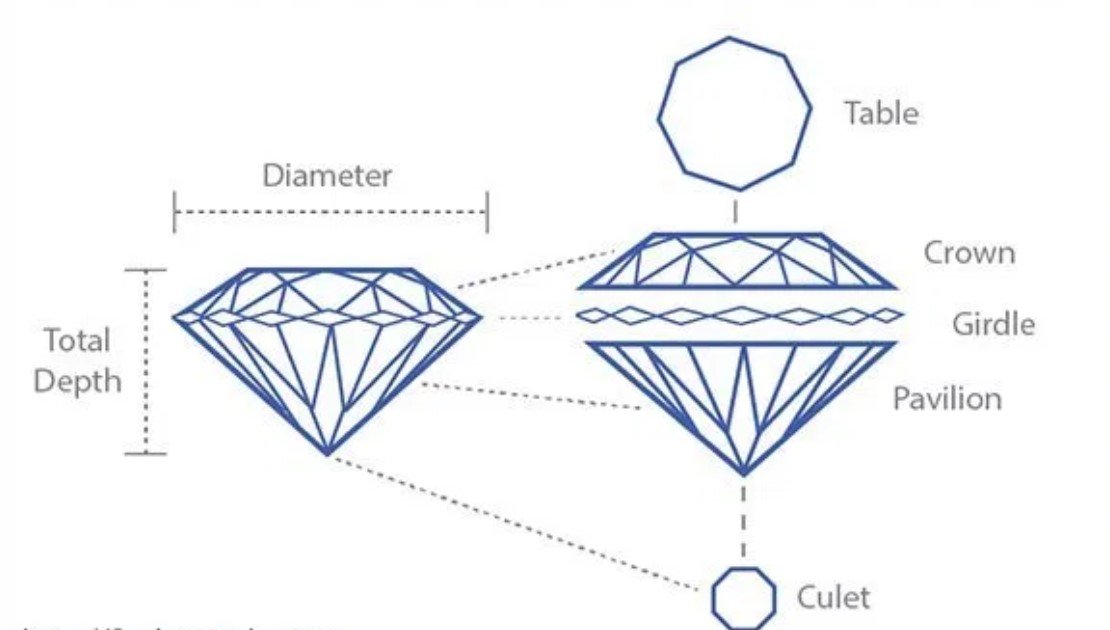

# Challenge 1: Exploratory Data Visualization Charts and Summary Statistics

The goal of this analysis is to understand the relationship between diamonds attributes (features) or group of attributes, and its price.

## Summary Statistics

In [6]:
# summary statistics data frame
df.describe().round(2)

,carat,depth,table,price,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,0.80,61.75,57.45,3928.44,5.73,5.73,3.54
std,0.48,1.43,2.23,3992.42,1.12,1.15,0.70
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,945.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2397.00,5.69,5.71,3.52
75%,1.04,62.50,59.00,5331.00,6.54,6.54,4.04
max,4.50,79.00,95.00,18823.00,10.23,58.90,8.06


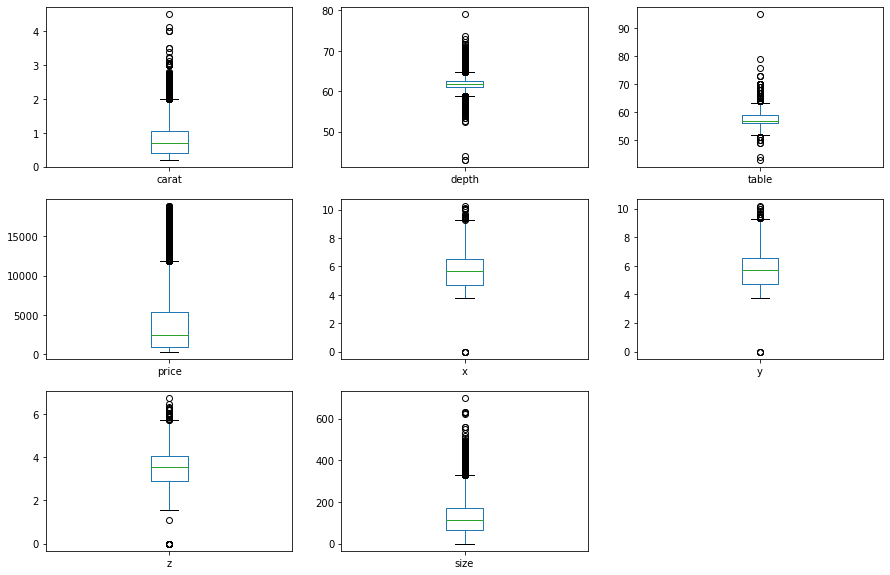

In [69]:
# box plot for all numeric columns
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [70]:
# conclusion: the most of the carat diamonds are between 0.4 and 1.04. There are some outliers up to 2.
# conclusion: there are outliers in both ways, and the mayority of the data are between 61 and 62.5

In [9]:
# correlations
df.corr().round(2)

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.97
depth,0.03,1.00,-0.29,-0.01,-0.03,-0.03,0.09
table,0.18,-0.29,1.00,0.13,0.20,0.18,0.16
price,0.92,-0.01,0.13,1.00,0.89,0.87,0.87
x,0.98,-0.03,0.20,0.89,1.00,0.97,0.98
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.96
z,0.97,0.09,0.16,0.87,0.98,0.96,1.00


In [10]:
# first impressions:
# price is very correlated with carat and size, but not much with table.
# ¿table is not related with any column?

## Data Visualization

In [11]:
# first of all, we add a column to know the size of the diamond.

df['size'] = (df['x']*df['y']*df['z']).round(2)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.10
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.40
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.44
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.27
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.43
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,221.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,324.28
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,163.99
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,54.90


### Question 1: How much correlated are the different columns?

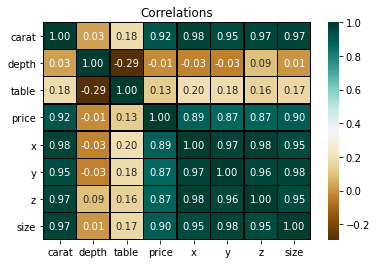

In [12]:
# correlation map
f,ax = plt.subplots(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True,annot_kws = {"size": 10},linecolor = "black", linewidths=0.5, fmt = '.2f', ax=ax,cmap = "BrBG")
plt.title("Correlations")
plt.show()

In [13]:
# CONCLUSION: Price is correlated with z,y,x and carat. But table and dept not much.

### Question 2: How are related size and price?

In [32]:
price_by_size = df.groupby(['size'], as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False)

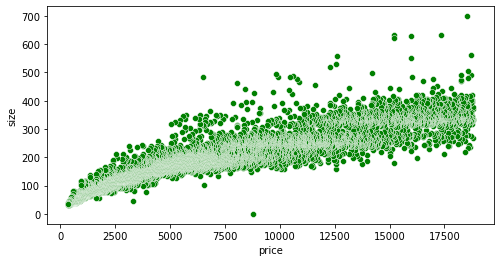

In [84]:
fig = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(data=price_by_size, x='price', y='size', color='green')

In [56]:
# let's check the outlier
price_by_size.max()

size      3840.6
price    18823.0
dtype: float64

In [65]:
# examine and drop
df[df['size'] == 3840.6]
df.drop(axis=0, index=14708, inplace=True)

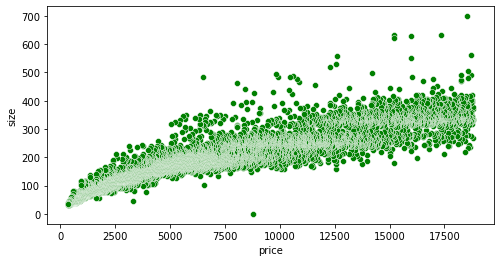

In [85]:
# we make aagain out scatter plot
fig = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(data=price_by_size, x='price', y='size', color='green')

In [15]:
# CONCLUSION: How much bigger is the diamond, more expensive is it.

### Question 3: How affect the carat to the price? (quilates)

In [17]:
# let's study just carat and price column
carat_by_price = df.groupby('carat', as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False)

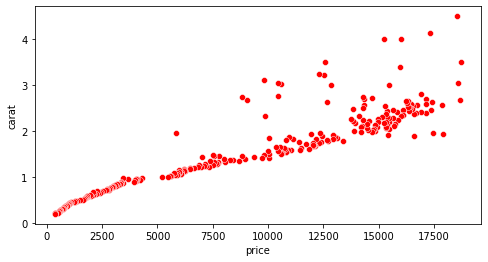

In [83]:
fig = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(data=carat_by_price, x='price', y='carat', color='red')

In [19]:
# CONCLUSION: The graph shows the positive correlation between carat and price of diamonds.
# But, in some cases, this is not true probably due tu the size of the diamon.

### Question 3: Which is the most expensive color?

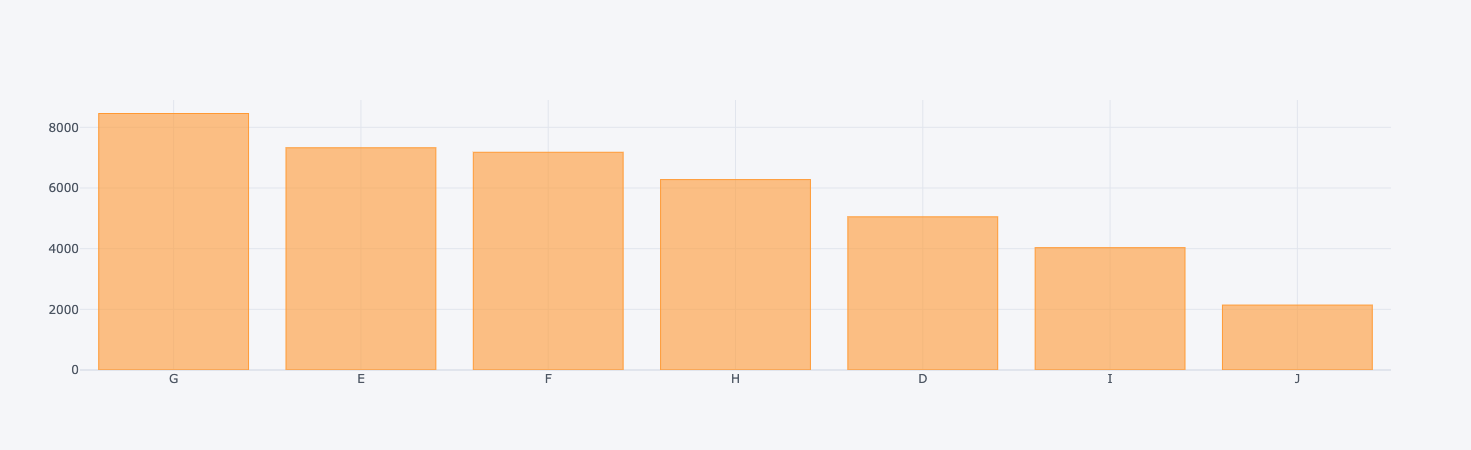

In [78]:
# total diamonds for each color
count_by_color = df['color'].value_counts()
count_by_color.iplot(kind='bar')

In [20]:
# grouping by color and mean price
price_mean_by_color = df.groupby('color', as_index=False).agg({'price': 'mean'}).sort_values(by='price', ascending=False).round(2)

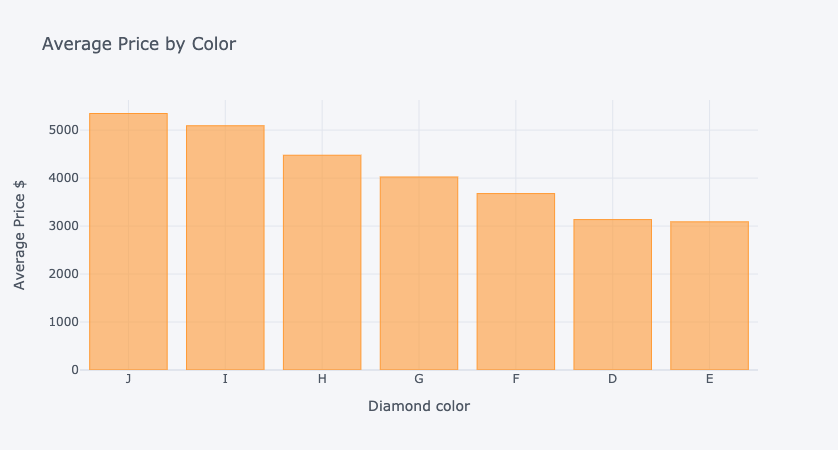

In [21]:
# using cf to make a plot.
price_mean_by_color.iplot(kind='bar',
                         x='color',
                         y='price',
                         title='Average Price by Color',
                         xTitle='Diamond color',
                         yTitle='Average Price $')

In [22]:
# CONCLUSION: J is the most expensive and the less common diamond. D and E have very similar prices. The most common diamond is G.

### Question 4: How cut affect the price?

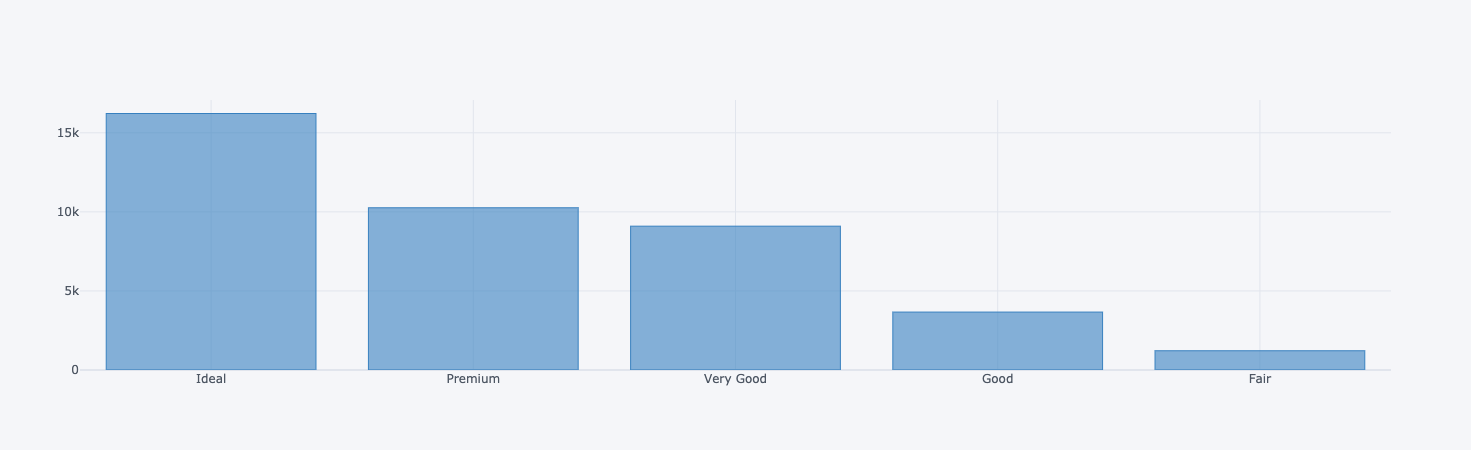

In [82]:
# how many diamonds are there in each cut cathegory?
count_by_color = df['cut'].value_counts()
count_by_color.iplot(kind='bar', color='blue')

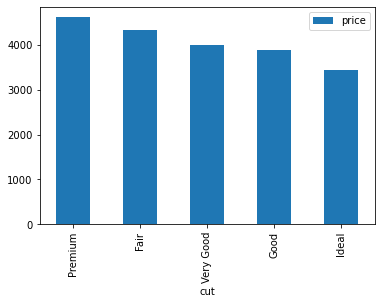

In [23]:
# gruping by cut and average price.
price_by_cut = df.groupby('cut', as_index=False).agg({'price':'mean'}).sort_values(by='price', ascending=False)

# plot using pandas
price_by_cut.plot.bar(x='cut', y='price');

In [24]:
# CONCLUSION: Premium diamonds are the most expensive ones and Ideal the cheapest.
# But Ideal es the top category, why are the cheapest?

In [94]:
df.groupby('cut').agg({'size': 'mean', 'price':'mean', 'carat':'mean', 'depth':'mean', 'table':'mean'}).round(2)

,size,price,carat,depth,table
cut,,,,,
Fair,165.09,4333.27,1.05,64.05,59.02
Good,135.43,3880.61,0.84,62.41,58.65
Ideal,114.96,3436.11,0.70,61.70,55.95
Premium,145.46,4616.58,0.90,61.26,58.74
Very Good,131.21,3994.44,0.81,61.82,57.96


In [97]:
# The Ideal cut are the most tiny and less carat. So carat and size are most important than cut?

In [107]:
ideal_diamonds = df[df['cut'] == 'Ideal']
ideal_diamonds.groupby('color').agg({'color':'count'})
#G, F, E, are the most common colors in Ideal diamonds, which are three of the cheapest colors.

,color
color,
D,2156
E,2917
F,2917
G,3640
H,2363
I,1538
J,689


### Question 5: How clarity affect the price?

In [112]:
price_by_clarity = df.groupby('clarity', as_index=False).agg({'price':'mean'}).sort_values(by='price', ascending=False)

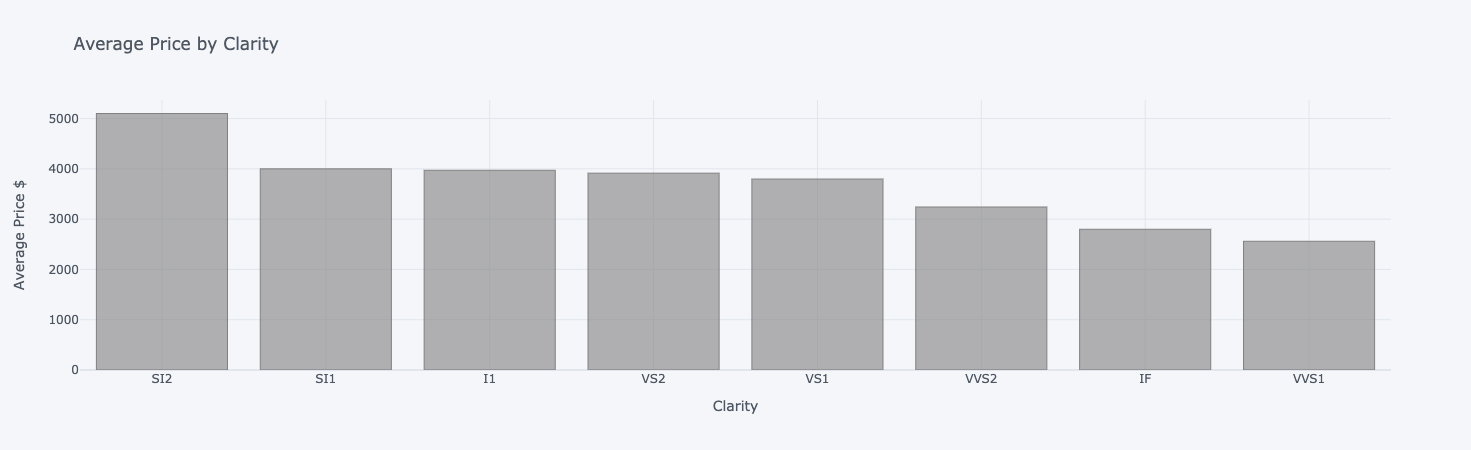

In [113]:
price_by_clarity.iplot(kind='bar',
                         x='clarity',
                         y='price',
                         title='Average Price by Clarity',
                         xTitle='Clarity',
                         yTitle='Average Price $',
                          color='grey')

In [28]:
# CONCLUSION: SI2 diamonds are the most expensive.